### Missing Values-Feature Engineering

Lifecycle of a Data Science Projects
1. Data Collection Statergy----From Company side,3rd party API's,Surveys
2. Feature Engineering----Handling Missing Values

Why are their Missing values?? Survey--Depression Survey     
--They hesitate to put down the information                   
--Survey information are not that valid                   
--People may have died---NAN                                 

Data Science Projects----Datasets should be collected from multiple sources

Data that will be missing?                                
--Continuous Data                                       
--Categorical Data                                   

### What are the different types of missing data

#### Missing Completely at Random MCAR:
There is absolutely no relationship between the data missing and any other values. This effectively implies that causes of the missing data are unrelated to the data. We may consequently ignore many of the complexities that arise because data are missing, apart from the obvious loss of information. 
An example of MCAR is when we take a random sample of a population, where each member has the same chance of being included in the sample. The (unobserved) data of members in the population that were not included in the sample are MCAR. 

In [21]:
import pandas as pd

In [22]:
df = pd.read_csv('titanic_data.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [23]:
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [24]:
df[df['embarked'].isnull()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
168,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,6,NaN,NaN
284,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,6,NaN,"Cincinatti, OH"


#### Missing Data Not At Random(MNAR):Systematic Missing Values

Missing not at random (MNAR) (also known as nonignorable nonresponse) is data that is neither MAR nor MCAR (i.e. the value of the variable that's missing is related to the reason it's missing). To extend the previous example, this would occur if men failed to fill in a depression survey because of their level of depression

In [26]:
import numpy as np
df['body_null'] = np.where(df['body'].isnull(),1,0)
### find the percentage of null value
df['body_null'].mean()

0.907563025210084

In [27]:
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,body_null
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,0
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN,1
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,0
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,1


In [31]:
df.groupby(['survived'])['body_null'].mean()

survived
0    0.850433
1    1.000000
Name: body_null, dtype: float64

#### Missing At Random

 MAR is an assumption that is impossible to verify statistically, we must rely on its substantive reasonableness. An example is that males are less likely to fill in a depression survey but this has nothing to do with their level of depression, after accounting for maleness.                
 Men--hide their salary                                         
 women--hide their age                              

### All the technique of handling missing values
1. mean/median/mode replacement
2. Random Sample Imputation
3. Capturing NAN values with a new features
4. End of distribution imputation
5. Arbitrary imputation
6. Frequent categories imputation

#### Mean/Median/Mode imputation
When should we apply?
Mean/Median imputation has the assumption that the data are missing completely at random(MCAR). we solve this by replacing the NAN with the most frequent coccurance of the variables

In [34]:
df = pd.read_csv('titanic_data.csv',usecols=['age','fare','survived'])
df.head()

,survived,age,fare
0,1,29.0000,211.3375
1,1,0.9167,151.5500
2,0,2.0000,151.5500
3,0,30.0000,151.5500
4,0,25.0000,151.5500


In [35]:
df.isnull().mean()

survived    0.000000
age         0.200917
fare        0.000764
dtype: float64

In [41]:
### All the NAN value is replace by median value through this method
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)

In [39]:
median = df.age.median()
median

28.0

In [40]:
impute_nan(df,'age',median)
df.head()

,survived,age,fare,age_median
0,1,29.0000,211.3375,29.0000
1,1,0.9167,151.5500,0.9167
2,0,2.0000,151.5500,2.0000
3,0,30.0000,151.5500,30.0000
4,0,25.0000,151.5500,25.0000


In [43]:
print(df['age'].std())
print(df['age_median'].std())

14.413499699923602
12.905246301411273


In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

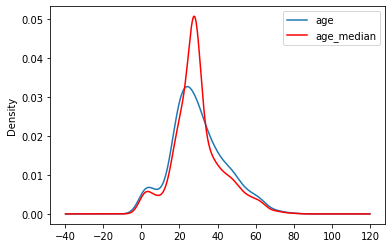

In [46]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['age'].plot(kind='kde',ax=ax)
df.age_median.plot(kind='kde',ax=ax,color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

### Advantages and disadvantages of mean/median/imputation
#### Advantages
1. Easy to implement(robust to outliers)
2. Faster way to obtain the complete dataset

#### Disadvantages
1. change or distortion in the orginal variance
2. impacts correlation